In [1]:
df = pd.read_csv('D:\\Atom\\Matlab\\论文\\识别结果\\result.csv')

In [2]:
matl_cnt = len(df['MATERIALS'].unique())
pos_cnt = len(df['POSITION'].unique())
len(df)

160

In [3]:
df['POSITION'].unique()

array([ 30,  33,  36,  39,  42,  45,  48,  51,  54,  57,  60,  63,  66,
        69,  72,  75,  78,  81,  84,  87,  90,  93,  96,  99, 102, 105,
       108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144,
       147], dtype=int64)

In [4]:
result = np.zeros((len(df), len(df)))
result.fill(np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POSITION     160 non-null    int64  
 1   MATERIALS    160 non-null    object 
 2   GUESSED POS  159 non-null    float64
 3   GUESSED      159 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.1+ KB


In [22]:
d = {'vinegar': 0, 'empty': 1, 'water': 2, 'oil2': 3}
for index, row in df.iterrows():
    ans = 0
    if np.isnan(row['GUESSED POS']):
        continue
    if row['POSITION'] == row['GUESSED POS']:
        ans += 50
    if row['MATERIALS'] == row['GUESSED']:
        ans += 50
    
    guessed = int((row['GUESSED POS']-30)/3 + d[row['GUESSED']]*40)
    result[index][guessed] = ans

In [23]:
import scipy.io
scipy.io.savemat('test.mat', {'mydata': result})

In [24]:
for name, group in df.groupby('MATERIALS'):
    print(name, len(group))

empty 40
oil2 40
vinegar 40
water 40


In [25]:
must = np.arange(30, 150, 3)
actual = df.groupby('MATERIALS').get_group('oil2')['POSITION']
np.setdiff1d(must, actual)

array([], dtype=int32)

In [26]:
df[df['GUESSED'].isnull()]

,POSITION,MATERIALS,GUESSED POS,GUESSED
123,39,oil2,NaN,NaN


In [27]:
df['MATERIALS'].unique()

array(['vinegar', 'empty', 'water', 'oil2'], dtype=object)

In [28]:
result[35,:]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan,  0., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [12]:
result

array([[100.,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  50.,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan, 100., ...,  nan,  nan,  nan],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [13]:
result.shape

(160, 160)

In [14]:
(result == 100).sum()

118

In [15]:
(result == 50).sum()

17

In [16]:
(result == 0).sum()

24

In [17]:
vinegar = result[0:31, 0:31]
empty = result[40:80, 40:80]
water = result[80:120, 80:120]
oil = result[120:160, 120:160]

In [39]:
for i in range(0, 4):
    print((result[i*40: i*40+31, i*40: i*40+31] >= 50).sum())

31
31
31
30


<ipython-input-39-7085e6c33d2d>:2: RuntimeWarning: invalid value encountered in greater_equal
  print((result[i*40: i*40+31, i*40: i*40+31] >= 50).sum())


In [30]:
np.set_printoptions(threshold=np.inf)

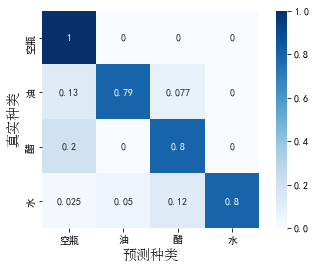

In [20]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib
Songti = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\STSONG.TTF')

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

df = pd.read_csv('D:\\Atom\\Matlab\\论文\\识别结果\\result.csv')
df = df[~df['GUESSED'].isnull()]
# labels = ['醋', '空瓶', '水', '油']
labels = ['空瓶', '油', '醋', '水']
mat = confusion_matrix(df['MATERIALS'], df['GUESSED'], normalize='true')
# mat = mat/np.array([40,39,40,40])
sns.heatmap(mat, square=True, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels) # , fmt='d', cbar=False
plt.xlabel('预测种类', fontproperties=Songti, fontsize=14)
plt.ylabel('真实种类', fontproperties=Songti, fontsize=14)
# plt.savefig('result1_conf_mat.png')

In [24]:
df[df['MATERIALS'] != df['GUESSED']]

,POSITION,MATERIALS,GUESSED POS,GUESSED
32,126,vinegar,79.0,empty
33,129,vinegar,68.0,empty
34,132,vinegar,71.0,empty
35,135,vinegar,89.0,empty
36,138,vinegar,85.0,empty
37,141,vinegar,75.0,empty
38,144,vinegar,66.0,empty
39,147,vinegar,69.0,empty
112,126,water,110.0,oil2
113,129,water,115.0,oil2


In [60]:
from collections import defaultdict
err = {'vinegar':defaultdict(lambda: 0), 'empty':defaultdict(lambda: 0), 'water':defaultdict(lambda: 0), 'oil2':defaultdict(lambda: 0)}
for name, group in df.groupby('MATERIALS'):
    for index, row in group.iterrows():
        err[name][row['POSITION']] += (row['MATERIALS'] != row['GUESSED'])

{'vinegar': defaultdict(<function <lambda> at 0x0000024269A2C040>, {30: 0, 33: 0, 36: 0, 39: 0, 42: 0, 45: 0, 48: 0, 51: 0, 54: 0, 57: 0, 60: 0, 63: 0, 66: 0, 69: 0, 72: 0, 75: 0, 78: 0, 81: 0, 84: 0, 87: 0, 90: 0, 93: 0, 96: 0, 99: 0, 102: 0, 105: 0, 108: 0, 111: 0, 114: 0, 117: 0, 120: 0, 123: 0, 126: 1, 129: 1, 132: 1, 135: 1, 138: 1, 141: 1, 144: 1, 147: 1}), 'empty': defaultdict(<function <lambda> at 0x0000024269C60160>, {30: 0, 33: 0, 36: 0, 39: 0, 42: 0, 45: 0, 48: 0, 51: 0, 54: 0, 57: 0, 60: 0, 63: 0, 66: 0, 69: 0, 72: 0, 75: 0, 78: 0, 81: 0, 84: 0, 87: 0, 90: 0, 93: 0, 96: 0, 99: 0, 102: 0, 105: 0, 108: 0, 111: 0, 114: 0, 117: 0, 120: 0, 123: 0, 126: 0, 129: 0, 132: 0, 135: 0, 138: 0, 141: 0, 144: 0, 147: 0}), 'water': defaultdict(<function <lambda> at 0x0000024269C600D0>, {30: 0, 33: 0, 36: 0, 39: 0, 42: 0, 45: 0, 48: 0, 51: 0, 54: 0, 57: 0, 60: 0, 63: 0, 66: 0, 69: 0, 72: 0, 75: 0, 78: 0, 81: 0, 84: 0, 87: 0, 90: 0, 93: 0, 96: 0, 99: 0, 102: 0, 105: 0, 108: 0, 111: 0, 114: 0

<ipython-input-59-96bf5745a9a3>:4: RuntimeWarning: invalid value encountered in true_divide
  pdf = data/sum(data)


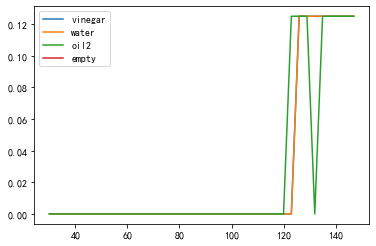

In [59]:
for matl in ['vinegar', 'water', 'oil2', 'empty']:
    data = np.fromiter(err[matl].values(), dtype='float')
    pdf = data/sum(data)
    cdf = np.cumsum(pdf)
    plt.plot(list(err[matl].keys()), pdf, label=matl)
    print(cdf)
plt.legend()

In [61]:
err

{'vinegar': defaultdict(<function __main__.<lambda>()>,
             {30: 0,
              33: 0,
              36: 0,
              39: 0,
              42: 0,
              45: 0,
              48: 0,
              51: 0,
              54: 0,
              57: 0,
              60: 0,
              63: 0,
              66: 0,
              69: 0,
              72: 0,
              75: 0,
              78: 0,
              81: 0,
              84: 0,
              87: 0,
              90: 0,
              93: 0,
              96: 0,
              99: 0,
              102: 0,
              105: 0,
              108: 0,
              111: 0,
              114: 0,
              117: 0,
              120: 0,
              123: 0,
              126: 1,
              129: 1,
              132: 1,
              135: 1,
              138: 1,
              141: 1,
              144: 1,
              147: 1}),
 'empty': defaultdict(<function __main__.<lambda>()>,
             {30: 0,
           

In [16]:
type(['test', '66'][0])

str

In [24]:
print(len(df['GUESSED']), len(df['MATERIALS']))

1 1


In [30]:
df['MATERIALS'].unique()

array(['vinegar', 'empty', 'water', 'oil2'], dtype=object)

In [32]:
mat

array([[32,  8,  0,  0],
       [ 0, 40,  0,  0],
       [ 5,  1, 32,  2],
       [ 3,  5,  0, 31]], dtype=int64)